<a href="https://colab.research.google.com/github/ManishManda/KNNAlgorithm/blob/main/KNNAlgorithmForImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from PIL import Image
from sklearn import neighbors
from sklearn import metrics
import glob
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import os
from PIL import Image
import glob
import random

# Import the glob module to search for files matching a specified pattern

In [ ]:
# Glob for all JPEGs.
normal_ = []
drag_disc= []
laser_spot=[]

for normal in glob.glob('normal*'):
    normal_.append(normal)

for glucoma in glob.glob('dragdisc*'):
    drag_disc.append(glucoma)

for laserspot in glob.glob('laserspot*'):
    laser_spot.append(laserspot)


# appending all images into single list

In [ ]:
all_images=[]

all_images=normal_+drag_disc+laser_spot

In [ ]:
all_images

['normal1.JPG',
 'normal10.JPG',
 'normal11.JPG',
 'normal12.JPG',
 'normal13.JPG',
 'normal14.JPG',
 'normal15.JPG',
 'normal16.JPG',
 'normal17.JPG',
 'normal18.JPG',
 'normal19.JPG',
 'normal2.JPG',
 'normal20.JPG',
 'normal21.JPG',
 'normal22.JPG',
 'normal23.JPG',
 'normal24.JPG',
 'normal25.JPG',
 'normal26.JPG',
 'normal27.JPG',
 'normal28.JPG',
 'normal29.JPG',
 'normal3.JPG',
 'normal30.JPG',
 'normal31.JPG',
 'normal32.JPG',
 'normal33.JPG',
 'normal34.JPG',
 'normal35.JPG',
 'normal36.JPG',
 'normal37.JPG',
 'normal38.JPG',
 'normal4.JPG',
 'normal5.JPG',
 'normal6.JPG',
 'normal7.JPG',
 'normal8.JPG',
 'normal9.JPG',
 'dragdisc1.JPG',
 'dragdisc10.JPG',
 'dragdisc2.JPG',
 'dragdisc3.JPG',
 'dragdisc4.JPG',
 'dragdisc5.JPG',
 'dragdisc6.JPG',
 'dragdisc7.JPG',
 'dragdisc8.JPG',
 'dragdisc9.JPG',
 'laserspot1.JPG',
 'laserspot10.JPG',
 'laserspot11.JPG',
 'laserspot12.JPG',
 'laserspot13.JPG',
 'laserspot14.JPG',
 'laserspot15.JPG',
 'laserspot16.JPG',
 'laserspot17.JPG',
 'l

In [ ]:
normal_green = []
normal_red = []
normal_blue = []
drag_disc_green = []
drag_disc_red = []
drag_disc_blue = []
laser_spot_red=[]
laser_spot_blue=[]
laser_spot_green=[]


print(len(normal_))
print(len(normal_)+len(drag_disc))


38
48


# This code calculates the percentage of red, green, and blue pixels in each image and stores them in separate lists based on the type of image (normal, drag disc, or laser spot).
# It iterates through the images, calculates the average RGB values, and then computes the
# percentage of each color channel relative to the sum of all color channels.
# Finally, it appends these percentages to the appropriate lists.
# The lists are normal_green, normal_blue, and normal_red for normal images;
# drag_disc_green, drag_disc_blue, and drag_disc_red for drag disc images; and
# laser_spot_green, laser_spot_blue, and laser_spot_red for laser spot images.


In [ ]:
for image in all_images[:len(normal_)]:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    percentage_green = averageGreen/(averageGreen+averageBlue+averageRed)
    percentage_blue = averageBlue/(averageGreen+averageBlue+averageRed)
    percentage_red = averageRed/(averageGreen+averageBlue+averageRed)
    normal_green.append(percentage_green)
    normal_blue.append(percentage_blue)
    normal_red.append(percentage_red)

for image in all_images[len(normal_):len(normal_)+len(drag_disc)]:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    percentage_green = averageGreen/(averageGreen+averageBlue+averageRed)
    percentage_blue = averageBlue/(averageGreen+averageBlue+averageRed)
    percentage_red = averageRed/(averageGreen+averageBlue+averageRed)
    drag_disc_green.append(percentage_green)
    drag_disc_blue.append(percentage_blue)
    drag_disc_red.append(percentage_red)

for image in all_images[len(normal_)+len(drag_disc):]:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    percentage_green = averageGreen/(averageGreen+averageBlue+averageRed)
    percentage_blue = averageBlue/(averageGreen+averageBlue+averageRed)
    percentage_red = averageRed/(averageGreen+averageBlue+averageRed)
    laser_spot_green.append(percentage_green)
    laser_spot_blue.append(percentage_blue)
    laser_spot_red.append(percentage_red)

In [ ]:
random.shuffle(all_images)

In [ ]:
print(len(laser_spot_red))

19


In [ ]:
print(len( drag_disc_green))

10


In [ ]:
print(all_images)

['laserspot1.JPG', 'normal29.JPG', 'normal27.JPG', 'normal6.JPG', 'laserspot11.JPG', 'normal14.JPG', 'normal12.JPG', 'laserspot13.JPG', 'normal32.JPG', 'laserspot6.JPG', 'normal9.JPG', 'normal16.JPG', 'laserspot14.JPG', 'normal26.JPG', 'normal36.JPG', 'normal38.JPG', 'normal34.JPG', 'laserspot7.JPG', 'laserspot17.JPG', 'normal11.JPG', 'laserspot19.JPG', 'laserspot4.JPG', 'laserspot12.JPG', 'dragdisc4.JPG', 'normal20.JPG', 'normal10.JPG', 'normal15.JPG', 'dragdisc8.JPG', 'laserspot5.JPG', 'normal13.JPG', 'normal24.JPG', 'dragdisc10.JPG', 'normal19.JPG', 'dragdisc6.JPG', 'normal30.JPG', 'normal17.JPG', 'normal3.JPG', 'normal18.JPG', 'laserspot16.JPG', 'normal4.JPG', 'normal7.JPG', 'dragdisc9.JPG', 'normal1.JPG', 'dragdisc1.JPG', 'normal25.JPG', 'laserspot2.JPG', 'dragdisc7.JPG', 'normal28.JPG', 'normal22.JPG', 'normal5.JPG', 'dragdisc5.JPG', 'dragdisc3.JPG', 'laserspot3.JPG', 'laserspot8.JPG', 'normal37.JPG', 'normal8.JPG', 'normal23.JPG', 'normal35.JPG', 'laserspot20.JPG', 'laserspot15.

In [ ]:
# strip filename extension and trailing digits. so, we can use them as labels
all_labels = []
all_image_labels = [os.path.splitext(each)[0] for each in all_images]
import string
for i in range(len(all_image_labels)):
    all_labels.append(all_image_labels[i].rstrip(string.digits))

print(all_labels, "# of labels: ", len(all_labels))

['laserspot', 'normal', 'normal', 'normal', 'laserspot', 'normal', 'normal', 'laserspot', 'normal', 'laserspot', 'normal', 'normal', 'laserspot', 'normal', 'normal', 'normal', 'normal', 'laserspot', 'laserspot', 'normal', 'laserspot', 'laserspot', 'laserspot', 'dragdisc', 'normal', 'normal', 'normal', 'dragdisc', 'laserspot', 'normal', 'normal', 'dragdisc', 'normal', 'dragdisc', 'normal', 'normal', 'normal', 'normal', 'laserspot', 'normal', 'normal', 'dragdisc', 'normal', 'dragdisc', 'normal', 'laserspot', 'dragdisc', 'normal', 'normal', 'normal', 'dragdisc', 'dragdisc', 'laserspot', 'laserspot', 'normal', 'normal', 'normal', 'normal', 'laserspot', 'laserspot', 'laserspot', 'laserspot', 'normal', 'dragdisc', 'normal', 'normal', 'normal'] # of labels:  67


In [ ]:
random.shuffle(all_images)
train_size = int(len(all_images) * 0.80)
test_size = int(len(all_images) * 0.20)
print (train_size, test_size)

53 13


In [ ]:
import shutil
dest_path = "data1/"
data_path = os.getcwd()

# path to destination folders
train_folder = os.path.join(dest_path, 'train')
test_folder = os.path.join(dest_path, 'test')

# Define a list of image extensions
image_extensions = ['.JPG']

# Create a list of image filenames in 'dest_path'
imgs_list = [filename for filename in os.listdir(data_path) if os.path.splitext(filename)[-1] in image_extensions]

# Create destination folders if they don't exist
for folder_path in [train_folder, test_folder]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Copy image files to destination folders.
# Make a copy of training data for processing here
training_data = []
for i, f in enumerate(all_images):
    if i < train_size:
        dest_folder = train_folder
    else:
        dest_folder = test_folder
    shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

    #setup training data copy for local processing
    training_data.append(f)

In [ ]:
#collect labels from training_data
img_labels = [os.path.splitext(each)[0] for each in training_data]

In [ ]:
#strip leading digits from image filenames.
import string
training_labels = []
for i in range(len(img_labels)):
    training_labels.append(img_labels[i].rstrip(string.digits))
print(training_labels, "# of labels: ", len(training_labels))

['laserspot', 'dragdisc', 'laserspot', 'normal', 'normal', 'normal', 'normal', 'dragdisc', 'normal', 'normal', 'normal', 'normal', 'normal', 'dragdisc', 'normal', 'laserspot', 'laserspot', 'normal', 'normal', 'normal', 'dragdisc', 'normal', 'normal', 'laserspot', 'laserspot', 'normal', 'laserspot', 'normal', 'laserspot', 'normal', 'normal', 'dragdisc', 'normal', 'normal', 'normal', 'normal', 'laserspot', 'laserspot', 'normal', 'laserspot', 'laserspot', 'dragdisc', 'dragdisc', 'laserspot', 'normal', 'laserspot', 'normal', 'dragdisc', 'normal', 'laserspot', 'laserspot', 'normal', 'laserspot', 'normal', 'laserspot', 'dragdisc', 'normal', 'normal', 'normal', 'normal', 'laserspot', 'normal', 'normal', 'dragdisc', 'normal', 'normal', 'normal'] # of labels:  67


In [ ]:
# Glob for all JPEGs.
test = './data1/test/'
test_data = [filename for filename in os.listdir(test) if os.path.splitext(filename)[-1] in image_extensions]
#strip trailing digits from the files and use them as labels
test_data_noext = [os.path.splitext(each)[0] for each in test_data]
print(test_data_noext)

['dragdisc1', 'dragdisc3', 'dragdisc4', 'dragdisc6', 'laserspot13', 'laserspot14', 'laserspot15', 'laserspot18', 'laserspot19', 'laserspot2', 'laserspot20', 'laserspot5', 'normal1', 'normal10', 'normal12', 'normal14', 'normal17', 'normal18', 'normal19', 'normal2', 'normal26', 'normal28', 'normal30', 'normal31', 'normal33', 'normal34', 'normal35', 'normal37', 'normal7', 'normal8', 'normal9']


In [ ]:
#collect labels from training_data
img_labels = [os.path.splitext(each)[0] for each in training_data]
#strip trailing digits from the files and use them as labels
test_data_noext = [os.path.splitext(each)[0] for each in test_data]
print(test_data_noext)
#prepare test_data labels: strip trailing digits
test_labels = []
import string
for i in range(len(test_data_noext)):
    test_labels.append(test_data_noext[i].rstrip(string.digits))
print(test_labels)

['dragdisc1', 'dragdisc3', 'dragdisc4', 'dragdisc6', 'laserspot13', 'laserspot14', 'laserspot15', 'laserspot18', 'laserspot19', 'laserspot2', 'laserspot20', 'laserspot5', 'normal1', 'normal10', 'normal12', 'normal14', 'normal17', 'normal18', 'normal19', 'normal2', 'normal26', 'normal28', 'normal30', 'normal31', 'normal33', 'normal34', 'normal35', 'normal37', 'normal7', 'normal8', 'normal9']
['dragdisc', 'dragdisc', 'dragdisc', 'dragdisc', 'laserspot', 'laserspot', 'laserspot', 'laserspot', 'laserspot', 'laserspot', 'laserspot', 'laserspot', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal']


In [ ]:
training_data_ = np.zeros((len(training_labels),3))

# Assigns RGB values from respective lists to training data based on image labels, using separate indices for each label type.
# Resulting training_data_ array contains RGB values for normal, drag disc, and laser spot images in respective columns.


In [ ]:
#create RGB arrays for normal and glucoma images
normal_index = 0
glucoma_index = 0
laser_spot_index=0
index=0
for i in range(len(training_labels)-1):
    if training_labels[i] == 'normal':
        training_data_[i,0] = normal_red[normal_index]
        training_data_[i,1] = normal_blue[normal_index]
        training_data_[i,2] = normal_green[normal_index]
        normal_index=normal_index+1
        index = index + 1
    if training_labels[i] == 'dragdisc':
        #print ("added an element for glucoma", i)
        training_data_[i,0] = drag_disc_red[glucoma_index]
        training_data_[i,1] = drag_disc_blue[glucoma_index]
        training_data_[i,2] = drag_disc_green[glucoma_index]
        glucoma_index=glucoma_index+1
        index = index + 1
    if training_labels[i] == 'laserspot':
        training_data_[i,0] = laser_spot_red[laser_spot_index]
        training_data_[i,1] = laser_spot_blue[laser_spot_index]
        training_data_[i,2] = laser_spot_green[laser_spot_index]
        laser_spot_index=laser_spot_index+1
        index = index + 1


In [ ]:
test_data_ = np.zeros((len(test_labels),3))

In [ ]:
print(len(training_data_))

67


 # Create a KNeighborsClassifier object (k2) with specified parameters:

In [ ]:
from sklearn import neighbors
k2 = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')
k2.fit(training_data_, training_labels)

KNeighborsClassifier(n_neighbors=3, weights='distance')

## Use the trained KNeighborsClassifier model (k2) to predict the labels for the test data (test_data_)


In [ ]:
k2_pred = k2.predict(test_data_)
print(k2_pred)

['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal']


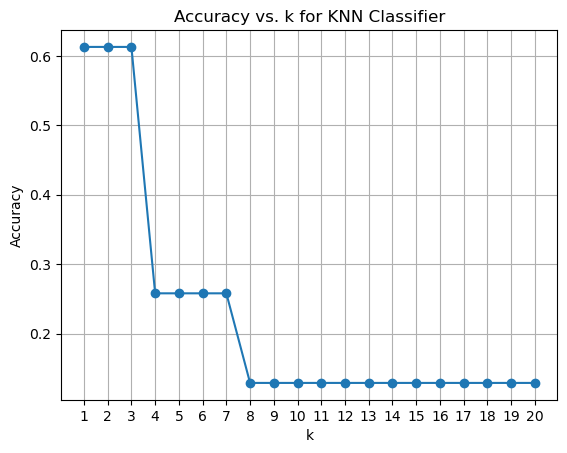

Optimal k value: 1


In [ ]:
accuracy_scores = []
k_values = range(1, 21)
# Iterate over each k value
for k in k_values:
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn.fit(training_data_, training_labels)

    # Evaluate the classifier on the testing data and compute accuracy
    accuracy = knn.score(test_data_, test_labels)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Plot the accuracy scores as a function of k
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for KNN Classifier')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal k value based on the elbow point
optimal_k = np.argmax(accuracy_scores) + 1
print("Optimal k value:", optimal_k)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_labels, k2_pred)

In [ ]:
print(acc)

0.6129032258064516


In [ ]:
# Initialize variables to count TP, FP, TN, FN for each class
true_positive_normal = 0
false_positive_normal = 0
true_negative_normal = 0
false_negative_normal = 0

true_positive_drag_disc = 0
false_positive_drag_disc = 0
true_negative_drag_disc = 0
false_negative_drag_disc = 0

true_positive_laser_sport = 0
false_positive_laser_sport = 0
true_negative_laser_sport = 0
false_negative_laser_sport = 0

# Iterate through predictions and actual labels
for i in range(len(k2_pred)):
    if k2_pred[i] == 'normal' and test_labels[i] == 'normal':
        true_positive_normal += 1
    if k2_pred[i] == 'normal' and test_labels[i] != 'normal':
        false_positive_normal += 1
    if k2_pred[i] != 'normal' and test_labels[i] != 'normal':
        true_negative_normal += 1
    if k2_pred[i] != 'normal' and test_labels[i] == 'normal':
        false_negative_normal += 1

    if k2_pred[i] == 'drag_disc' and test_labels[i] == 'drag_disc':
        true_positive_drag_disc += 1
    if k2_pred[i] == 'drag_disc' and test_labels[i] != 'drag_disc':
        false_positive_drag_disc += 1
    if k2_pred[i] != 'drag_disc' and test_labels[i] != 'drag_disc':
        true_negative_drag_disc += 1
    if k2_pred[i] != 'drag_disc' and test_labels[i] == 'drag_disc':
        false_negative_drag_disc += 1

    if k2_pred[i] == 'laser_sport' and test_labels[i] == 'laser_sport':
        true_positive_laser_sport += 1
    if k2_pred[i] == 'laser_sport' and test_labels[i] != 'laser_sport':
        false_positive_laser_sport += 1
    if k2_pred[i] != 'laser_sport' and test_labels[i] != 'laser_sport':
        true_negative_laser_sport += 1
    if k2_pred[i] != 'laser_sport' and test_labels[i] == 'laser_sport':
        false_negative_laser_sport += 1

# Construct confusion matrices
conf_matrix_normal = [[true_positive_normal, false_positive_normal],
                      [false_negative_normal, true_negative_normal]]

conf_matrix_drag_disc = [[true_positive_drag_disc, false_positive_drag_disc],
                         [false_negative_drag_disc, true_negative_drag_disc]]

conf_matrix_laser_sport = [[true_positive_laser_sport, false_positive_laser_sport],
                            [false_negative_laser_sport, true_negative_laser_sport]]

# Print confusion matrices
print("Confusion Matrix - Normal:")
for row in conf_matrix_normal:
    print(row)

print("\nConfusion Matrix - Drag Disc:")
for row in conf_matrix_drag_disc:
    print(row)

print("\nConfusion Matrix - Laser Sport:")
for row in conf_matrix_laser_sport:
    print(row)


Confusion Matrix - Normal:
[19, 12]
[0, 0]

Confusion Matrix - Drag Disc:
[0, 0]
[0, 31]

Confusion Matrix - Laser Sport:
[0, 0]
[0, 31]


In [ ]:
# Calculate total number of predictions
total_predictions = len(k2_pred)

# Calculate total number of correct predictions
total_correct = true_positive_normal + true_positive_drag_disc + true_positive_laser_sport

# Calculate accuracy
accuracy = total_correct / total_predictions

# Print accuracy
print("Model Accuracy:", accuracy)


Model Accuracy: 0.6129032258064516
